# Assignment 1

## Question 1

Optimise the following function using torch autograd and gradient descent, $f(\theta) = (\theta_0 - 2)^2 + (\theta_1 - 3)^2$. In addition to finding the optima, you need to show the convergence plots.

### Importing Libraries

In [1]:
import numpy as np
import torch
import torch.optim as optim
import torch.distributions as dist
import matplotlib.pyplot as plt

### Definition of the function
$$
f(\vec{\theta}) = (\theta_0 - 2)^2 + (\theta_1 - 3)^2
$$

In [2]:
def f(theta):
    return (theta[0] - 2)**2 + (theta[1] - 3)**2

### Theta initialization

In [3]:
# Initialize parameters using normal distribution
normal = dist.Normal(0, 1)
theta = torch.tensor([normal.sample(), normal.sample()], requires_grad=True)

### Setting up hyperparameters and the optimizer

In [4]:
alpha = 0.1 # learning rate
num_epochs = 100

# Setting up the SGD optimizer
optimizer = optim.SGD([theta], lr=alpha)

# Lists to store the function valueds and parameter updates for plotting convergence
valuesHistory = []
thetaHistory = []

### Gradient descent

In [5]:
# Gradient Descent loop
for epoch in range(num_epochs):
    # Calculate the Value
    value = f(theta)
    valuesHistory.append(value.item())

    # Store current parameter values for plotting
    thetaHistory.append((theta[0].item(), theta[1].item()))

    # Zero gradients
    optimizer.zero_grad()

    # Calculate gradients
    value.backward()

    # Update parameters using the optimizer
    optimizer.step()

# Optimal parameter values
optimal_theta = theta.detach()

### Displaying parameter values and plotting convergence

In [6]:
print(f"theta_0 = {optimal_theta[0]}\ntheta_1 = {optimal_theta[1]}")

theta_0 = 1.999999761581421
theta_1 = 2.999999523162842


The below plot shows how the value of the function is changing with every epoch of the gradient descent loop.

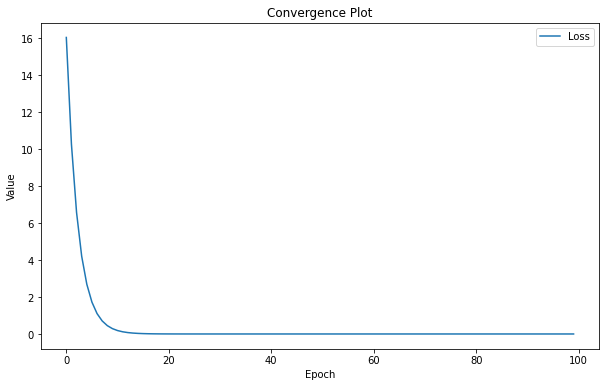

In [7]:
# Plot the convergence
plt.figure(figsize=(10, 6))
plt.plot(valuesHistory, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Convergence Plot')
plt.legend()
plt.show()

The 3D surface plot presented below provides a comprehensive view of the behavior of the function with respect to adjustments in the parameters $\theta_0$ and $\theta_1$. On the horizontal axes, we have the values of $\theta_0$ and $\theta_1$, while on the vertical axis, the function value $(\theta_0 - 2)^2 + (\theta_1 - 3)^2$ is represented.

Superimposed onto the surface plot are red markers, which trace the trajectory of the function values as the optimization algorithm progresses through multiple epochs of gradient descent. Each red dot represents the function value attained at a particular setting of $\theta_0$ and $\theta_1$ after a single epoch.

This visual representation effectively highlights the convergence of the optimization process towards the minimum point of the function. As you observe the trajectory, it becomes evident that the algorithm consistently updates the parameters to steer the function values towards the lowest point of the bowl, which corresponds to the vertex of the paraboloid surface.

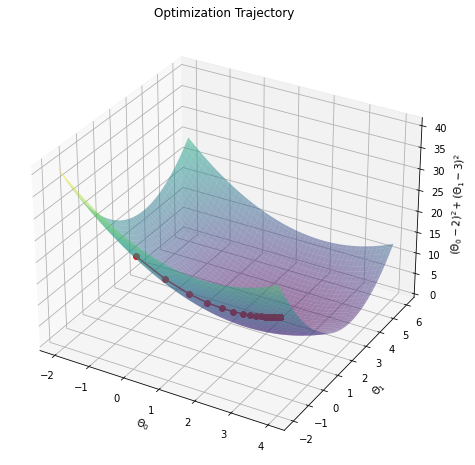

In [8]:
thetaHistory = np.array(thetaHistory)

theta0_vals = np.linspace(-2, 4, 100)
theta1_vals = np.linspace(-2, 6, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
function_values = (theta0_grid - 2)**2 + (theta1_grid - 3)**2

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_grid, theta1_grid, function_values, cmap='viridis', alpha=0.5)
ax.plot(thetaHistory[:, 0], thetaHistory[:, 1], valuesHistory, marker='o', color='red')
ax.set_xlabel('${\Theta}_0$')
ax.set_ylabel('${\Theta}_1$')
ax.set_zlabel('$(\Theta_0 - 2)^2 + (\Theta_1 - 3)^2$')
ax.set_title('Optimization Trajectory')
plt.show()

## Question 4

Analytically derive the MLE for exponential distribution. Generate some data (1000 data points) using some fixed parameter values and see if you can recover the analytical parameters using gradient descent based solution for obtaining MLE.

### Analytical Derivation

$$
f(x; \lambda) = \lambda e^{-\lambda x}
$$

Assuming $X = [x_1, x_2,\dotsc,x_n]$ and all x's are IIDs.

The likelihood of the parameter is given by
$$
L(\lambda) = f(x_1, x_2, \dotsc, x_n; \lambda) = f(X; \lambda) = \lambda^n e^{-\lambda \sum_{i} {x_i}}
$$

Applying Maximum Likelihood Estimation,

$$
\frac{\mathrm{d}L(\lambda)}{\mathrm{d}\lambda} = n \lambda^{n - 1} e^{-\lambda \sum_{i}{x_i}} -\lambda^{n} e^{-\lambda \sum_{i}{x_i}}\sum_{i}{x_i}  = 0 \\
n - \lambda \sum_{i}x_i = 0 \\
\hat{\lambda}_{\text{MLE}} = \frac{n}{\sum_{i}x_i} = \frac{1}{\mu}
$$

### Generating Data

Sampling 1000 data points from an exponential distribution with $\lambda = 0.5$

In [9]:
data = dist.Exponential(0.5).sample(torch.Size([1000]))

### Gradient Descent

In [10]:
num_epochs = 10000

normal = dist.Normal(0, 1)
lambda_param = torch.tensor([abs(normal.sample())], requires_grad=True)

alpha=0.0001
optimizer = optim.SGD([lambda_param], lr=alpha)


# Gradient Descent loop
for epoch in range(num_epochs):
    # Calculate the negative log likelihood
    likelihood = -(dist.Exponential(lambda_param).log_prob(data).sum())

    # Zero gradients
    optimizer.zero_grad()

    # Calculate gradients
    likelihood.backward()

    # Update parameter using the optimizer
    optimizer.step()

# Optimal parameter values
optimal_lambda = lambda_param.detach()

$\lambda$ calculated using gradient descent

In [11]:
print(optimal_lambda.item())

0.4944804310798645


$\lambda$ calculated via analytical MLE

In [12]:
print((1/data.mean()).item())

0.4944804012775421


### Observations

The $\lambda$ calculated using the analytical method and gradient descent are fairly close to each other.

## Question 3

Generate some data (1000 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0 and using Student-T distributions with varying degrees (from 1-8) of freedom (1000 data points corresponding to each degree of freedom). Plot the pdf (and logpdf) at uniformly spaced data from (-50, 50) in steps of 0.1. What can you conclude?

### Defining constant parameters

In [13]:
loc = 2.0
scale = 4.0
dof = range(1, 9)
x = torch.arange(-50, 50, 0.1)

### Generating data from given distributions and Plotting PDF and log PDF

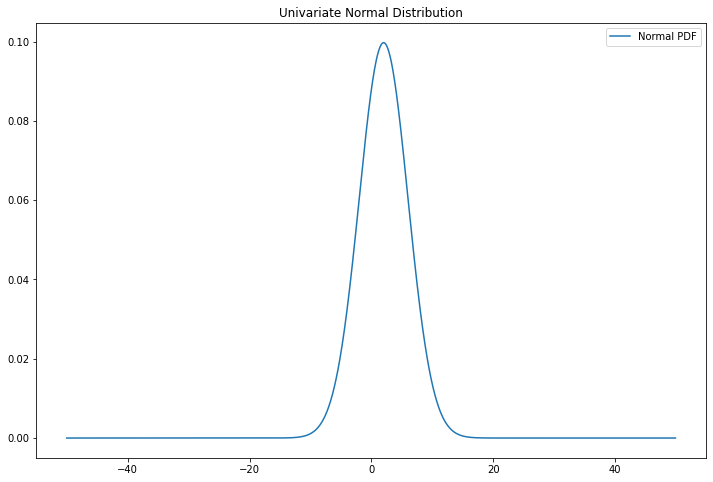

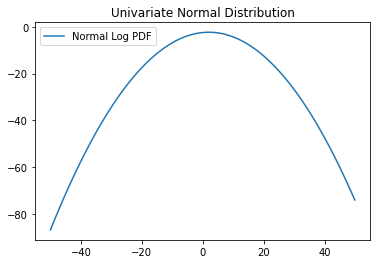

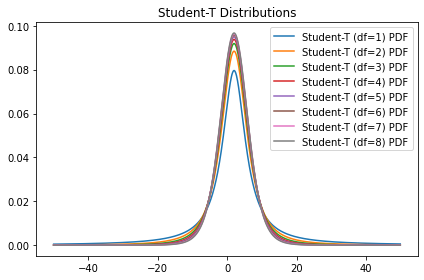

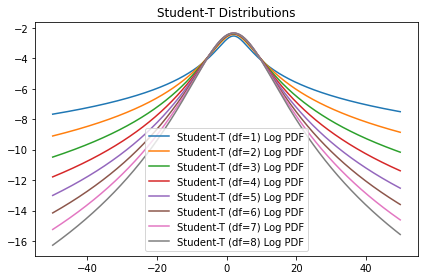

In [14]:
plt.figure(figsize=(12, 8))

# Univariate Normal distribution
normal_dist = torch.distributions.Normal(loc, scale)
normal_pdf = normal_dist.log_prob(x).exp()
plt.plot(x.numpy(), normal_pdf.numpy(), label='Normal PDF')
plt.title('Univariate Normal Distribution')
plt.legend()
plt.show()
plt.plot(x.numpy(), normal_dist.log_prob(x).numpy(), label='Normal Log PDF')
plt.title('Univariate Normal Distribution')
plt.legend()
plt.show()

# Student-T distributions with varying degrees of freedom

for df in dof:
    t_dist = torch.distributions.StudentT(df, loc, scale)
    t_pdf = t_dist.log_prob(x).exp()
    plt.plot(x.numpy(), t_pdf.numpy(), label=f'Student-T (df={df}) PDF')
plt.title('Student-T Distributions')
plt.legend()

plt.tight_layout()
plt.show()

for df in dof:
    t_dist = torch.distributions.StudentT(df, loc, scale)
    t_pdf = t_dist.log_prob(x).exp()
    plt.plot(x.numpy(), t_dist.log_prob(x).numpy(), label=f'Student-T (df={df}) Log PDF')
plt.title('Student-T Distributions')
plt.legend()

plt.tight_layout()
plt.show()


### Conclusions

- The Student-T distribution approaches the Normal distribution as the degrees of freedom increase. This highlights the **Central Limit Theorem** for the Student-T distribution.
- As demonstrated in the plots, distributions with higher degrees of freedom (e.g., df = 8) closely resemble the Normal distribution in terms of shape, symmetry and tail behaviour.
- The Student-T distribution with lower degrees of freedom exhibits heavier tails than the Normal distribution. This is evident from the longer and fatter tails in the PDF plots. These heavier tails indicate a higher probability of observing extreme values, which is a characteristic of the Student-T distribution.
- On the more computational side of things, it is quite evident from looking at the plots that log pdf are better technically than PDFs.
- The log PDFs make it easier to compare different distributions visually. The convergence of the Student-T distributions to the Normal distribution with increasing degrees of freedom is more evident in the log PDF plots.
- When comparing similar distributions, the log PDFs highlight the differences in their shapes more effectively.
- Looking at the tails of the Student-T distributions with lower degrees of freedom, you can observe that the PDF values become very small as the values move away from the mean. The values due to error in floating point precision, the values incorrectly become 0.
- The log PDF, on the other hand, transforms these small probabilities into more manageable values. This prevents issues like underflow, ensuring that extreme probabilites are accuately represented and calculated.

## Question 5

Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0. Now, create datasets of size 10, 20, 50, 100, 500, 1000, 5000, 10000. We will use a different random seed to create ten different datasets for each of these sizes. For each of these datasets, find the MLE parameters for the loc and scale using gradient descent. Plot the estimates of loc and scale as a function of the dataset size. What can you conclude?

In [15]:
true_loc = 2.0
true_scale = 4.0
normal_dist = dist.Normal(loc=true_loc, scale=true_scale)
dataset_sizes = [10, 20, 50, 100, 500, 1000, 5000, 10000]

def generate_data(size, seed):
    torch.manual_seed(seed=seed)
    return normal_dist.sample([size])

datasets = []
for i in range(len(dataset_sizes)):
    datasets.append(generate_data(dataset_sizes[i], i))

alpha = 0.01
num_epochs = 5000

def negative_log_likelihood(data, loc, scale):
    return 0.5 * torch.mean(((data - loc) / scale)**2) + 0.5 * torch.log(scale**2)


locs = []
scales = []
for i in range(len(datasets)): 
    initial_loc = torch.tensor(0.0, requires_grad=True)
    initial_scale = torch.tensor(1.0, requires_grad=True)

    for epoch in range(num_epochs):
        loss = negative_log_likelihood(datasets[i], initial_loc, initial_scale)
        loss.backward()

        with torch.no_grad():
            initial_loc -= alpha * initial_loc.grad
            initial_scale -= alpha * initial_scale.grad

            initial_loc.grad = None
            initial_scale.grad = None

    locs.append(initial_loc.item())
    scales.append(initial_scale.item())

### Plotting 

Locs and Scales as a function of dataset size is plotted

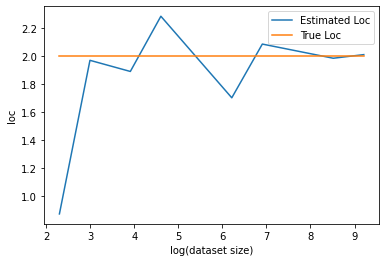

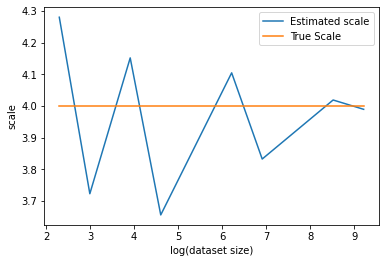

In [16]:
plt.plot([np.log(i) for i in dataset_sizes], locs, label='Estimated Loc')
plt.plot([np.log(i) for i in dataset_sizes], [true_loc for i in range(len(dataset_sizes))], label='True Loc')
plt.xlabel('log(dataset size)')
plt.ylabel('loc')
plt.legend()
plt.show()
plt.plot([np.log(i) for i in dataset_sizes], scales, label='Estimated scale')
plt.plot([np.log(i) for i in dataset_sizes], [true_scale for i in range(len(dataset_sizes))], label='True Scale')
plt.xlabel('log(dataset size)')
plt.ylabel('scale')
plt.legend()
plt.show()

## Question 2

Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0.

1. Plot a 2d contour plot showing the Likelihood or the Log-Likelihood as a function of loc and scale. Please label all the axes including the colorbar. [1 mark]

2. Find the MLE parameters for the loc and scale using gradient descent. Plot convergence plot as well. [1 mark]

3. Redo the above question but learn log(scale) instead of scale and then finally transform to learn scale. What can you conclude? Why is this transformation useful? [0.5 mark]

### Question 2.2

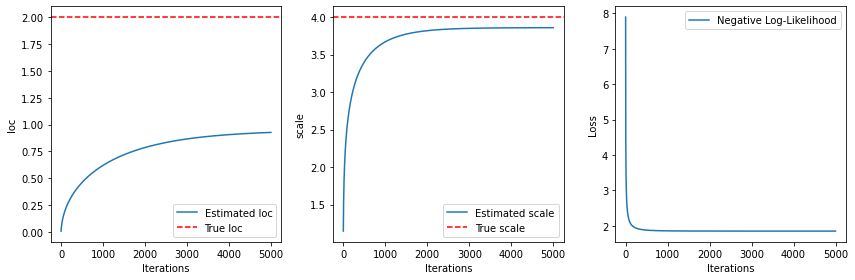

In [21]:
true_loc = 2.0
true_scale = 4.0
data = torch.normal(true_loc, true_scale, size=(100,))

def negative_log_likelihood(data, loc, scale):
    return 0.5 * torch.mean(((data - loc) / scale)**2) + 0.5 * torch.log(scale**2)

initial_loc = torch.tensor(0.0, requires_grad=True)
initial_scale = torch.tensor(1.0, requires_grad=True)
alpha = 0.01
num_iterations = 5000

loc_history = []
scale_history = []
loss_history = []

for _ in range(num_iterations):
    loss = negative_log_likelihood(data, initial_loc, initial_scale)
    loss.backward()

    with torch.no_grad():
        initial_loc -= alpha * initial_loc.grad
        initial_scale -= alpha * initial_scale.grad

        initial_loc.grad = None
        initial_scale.grad = None

    loc_history.append(initial_loc.item())
    scale_history.append(initial_scale.item())
    loss_history.append(loss.item())

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(loc_history, label='Estimated loc')
plt.axhline(y=true_loc, color='r', linestyle='--', label='True loc')
plt.xlabel('Iterations')
plt.ylabel('loc')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(scale_history, label='Estimated scale')
plt.axhline(y=true_scale, color='r', linestyle='--', label='True scale')
plt.xlabel('Iterations')
plt.ylabel('scale')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(loss_history, label='Negative Log-Likelihood')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Question 2.3

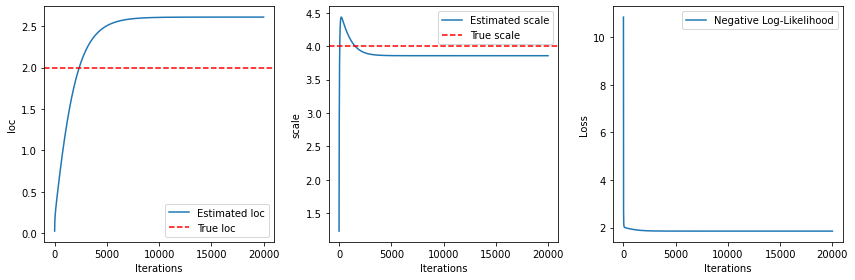

In [18]:
true_loc = 2.0
true_scale = 4.0
data = torch.normal(true_loc, true_scale, size=(100,))

initial_loc = torch.tensor(0.0, requires_grad=True)
initial_log_scale = torch.tensor(0.0,  requires_grad=True)
learning_rate = 0.01
num_iterations = 20000

loc_history = []
log_scale_history = []
loss_history = []

for _ in range(num_iterations):
    loss = 0.5 * torch.mean(((data - initial_loc) / torch.exp(initial_log_scale))**2) + initial_log_scale
    loss.backward()

    with torch.no_grad():
        initial_loc -= learning_rate * initial_loc.grad
        initial_log_scale -= learning_rate * initial_log_scale.grad

        initial_loc.grad = None
        initial_log_scale.grad = None

    loc_history.append(initial_loc.item())
    log_scale_history.append(initial_log_scale.item())
    loss_history.append(loss.item())

scale_history = [np.exp(log_scale) for log_scale in log_scale_history]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(loc_history, label='Estimated loc')
plt.axhline(y=true_loc, color='r', linestyle='--', label='True loc')
plt.xlabel('Iterations')
plt.ylabel('loc')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(scale_history, label='Estimated scale')
plt.axhline(y=true_scale, color='r', linestyle='--', label='True scale')
plt.xlabel('Iterations')
plt.ylabel('scale')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(loss_history, label='Negative Log-Likelihood')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Question 2.1

### Calculating Log Likelihoods

In [19]:
data = dist.Normal(loc=2.0,scale=4.0).sample((100,))

loc_range = torch.linspace(0, 4, 100)
scale_range = torch.linspace(1, 7, 100)
loc_grid, scale_grid = torch.meshgrid(loc_range, scale_range)
likelihoods = torch.zeros_like(loc_grid)

for i in range(len(loc_range)):
    for j in range(len(scale_range)):
        distrib = dist.Normal(loc=loc_range[i], scale=scale_range[j])
        likelihoods[i,j] = torch.sum(distrib.log_prob(data))

/Users/ar7d3/Library/Python/3.10/lib/python/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


### Plotting
2D contour plot showing log likelihood as a function of loc and scale

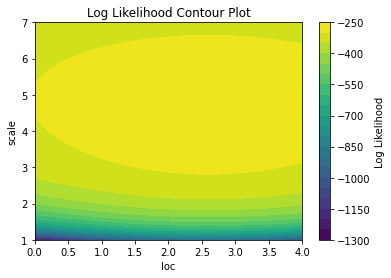

In [20]:
contour = plt.contourf(loc_grid, scale_grid, likelihoods, levels=20)
plt.colorbar(contour, label='Log Likelihood')
plt.title('Log Likelihood Contour Plot')
plt.xlabel('loc')
plt.ylabel('scale')
plt.show()